In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statistics import mode
import matplotlib.pyplot as plt


In [5]:
#import dataset
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

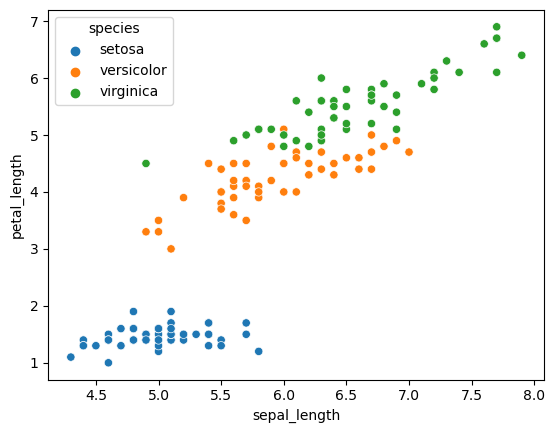

In [9]:
sns.scatterplot(data = df, x = 'sepal_length', y = 'petal_length', hue = 'species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

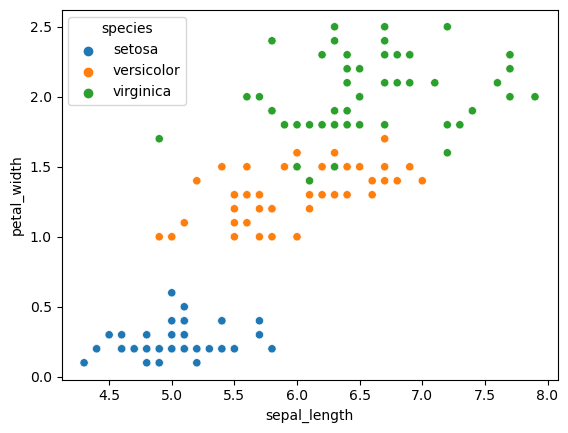

In [10]:
sns.scatterplot(data = df, x = 'sepal_length', y = 'petal_width', hue = 'species')

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

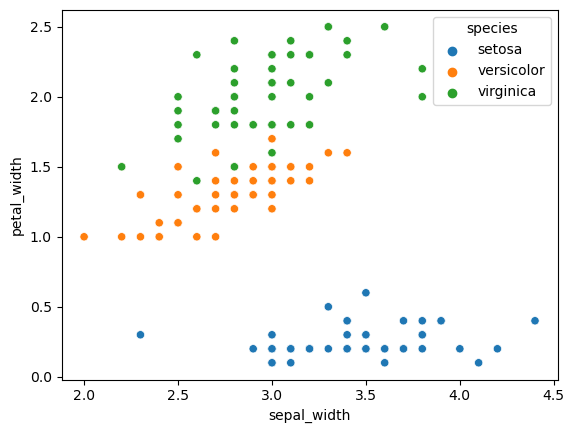

In [11]:
sns.scatterplot(data = df, x = 'sepal_width', y = 'petal_width', hue = 'species')

<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

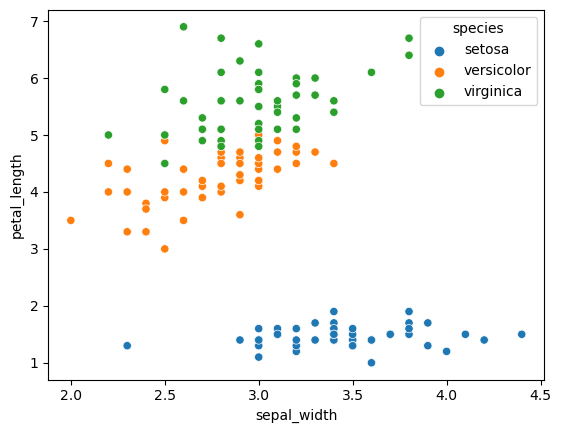

In [12]:
sns.scatterplot(data = df, x = 'sepal_width', y = 'petal_length', hue = 'species')

In [28]:
#It seems that the data is well grouped
#data cleaning first

scaler = preprocessing.MaxAbsScaler()
df[['sepal_length','sepal_width','petal_length','petal_width']] = scaler.fit_transform(df[['sepal_length','sepal_width','petal_length','petal_width']])

print(df.isna().sum())
df.describe()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.739662,0.694848,0.544638,0.479733
std,0.104818,0.099061,0.255840,0.304895
min,0.544304,0.454545,0.144928,0.040000
25%,0.645570,0.636364,0.231884,0.120000
50%,0.734177,0.681818,0.630435,0.520000
75%,0.810127,0.750000,0.739130,0.720000
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='sepal_length', ylabel='species'>

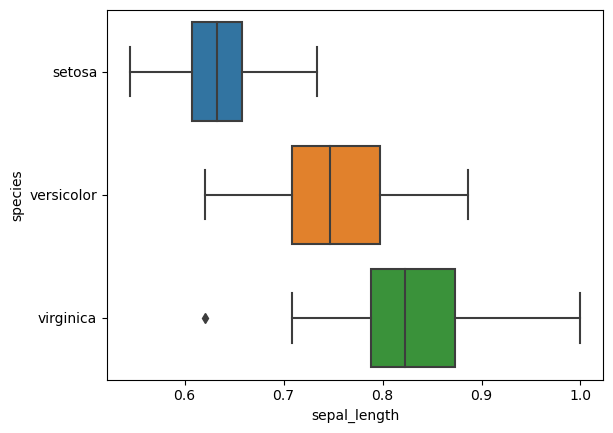

In [48]:
sns.boxplot(data=df, x='sepal_length', y='species')

<AxesSubplot:xlabel='petal_length', ylabel='species'>

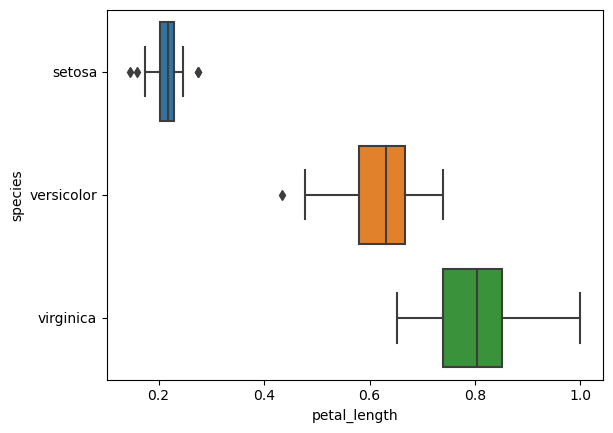

In [49]:
sns.boxplot(data=df, x='petal_length', y='species')

In [163]:
#data preprocessing
X = df[['sepal_length','sepal_width','petal_length','petal_width']]

df['y'] = 0
df.loc[df['species'] == 'setosa', 'y'] = 0
df.loc[df['species'] == 'versicolor', 'y'] = 1
df.loc[df['species'] == 'virginica', 'y'] = 2

y = df['y']



In [164]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

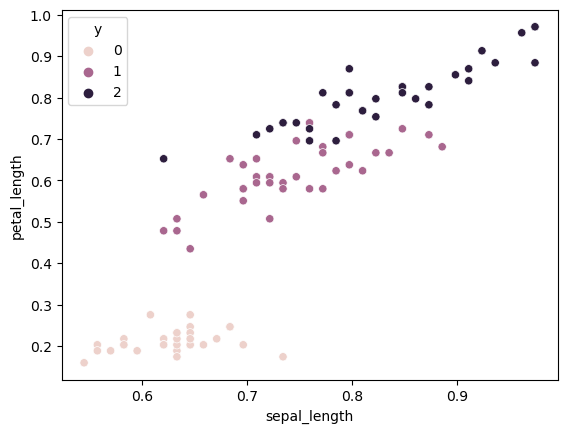

In [165]:
sns.scatterplot(data=df_train, x='sepal_length', y='petal_length', hue='y')

In [166]:
#Euclidean distance
def Euclidean_distance(A,B):
    A = np.array(A)
    B = np.array(B)
    
    dis = np.sqrt(sum((A-B)**2))
    return dis

In [167]:
#build KNN algorithm
k = 3
y_hat = []

for i in range(len(df_test)):
    #find every data point in testing data
    tmp = X_test.iloc[i]
    #calculate the distance between training data and testing data
    df_train['distance'] = X_train.apply(lambda row:Euclidean_distance(row,tmp), axis=1)
    #sort X_train according to the three point with closest distance
    y_hat.append(mode(list(df_train.sort_values(by=['distance']).head(k)['y'])))

df_test['y_hat'] = y_hat
#compare with y and y_hat
accuracy = len(df_test[df_test['y'] == df_test['y_hat']])/len(df_test)
print(f'{accuracy*100:.2f}%')

98.00%


C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\863080536.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['sepal_length']
C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\863080536.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['petal_length']
C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\863080536.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['sepal_length']
C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\863080536.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['petal_length']
C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\863080536.py:10: UserWarning: Boole

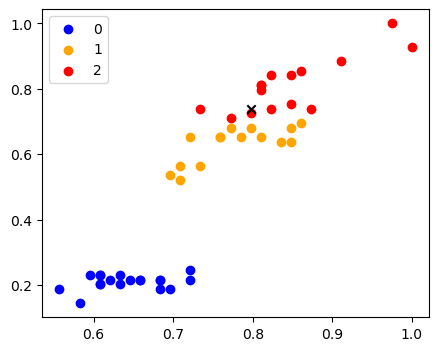

In [168]:
plt.figure(figsize=[5,4])
plt.scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['sepal_length']
            ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['petal_length']
           ,c='blue')

plt.scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['sepal_length']
            ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['petal_length']
           ,c='orange')

plt.scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==2]['sepal_length']
            ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==2]['petal_length']
           ,c='red')

plt.scatter(x=df_test[df_test['y'] != df_test['y_hat']]['sepal_length']
            ,y=df_test[df_test['y'] != df_test['y_hat']]['petal_length']
           ,c='black',marker='x')

l = [0,1,2]
plt.legend(l)

In [169]:
k = 1
n = 150
K_p = []
while k <= n:
    y_hat = []

    for i in range(len(df_test)):
        #find every data point in testing data
        tmp = X_test.iloc[i]
        #calculate the distance between training data and testing data
        df_train['distance'] = X_train.apply(lambda row:Euclidean_distance(row,tmp), axis=1)
        #sort X_train according to the three point with closest distance
        y_hat.append(mode(list(df_train.sort_values(by=['distance']).head(k)['y'])))

    df_test['y_hat'] = y_hat
    #compare with y and y_hat
    accuracy = len(df_test[df_test['y'] == df_test['y_hat']])/len(df_test)
#     print(f'when k={k}, accuracy={accuracy*100:.2f}%')
    K_p.append(accuracy)
    k+=1

<AxesSubplot:xlabel='K', ylabel='Accuracy'>

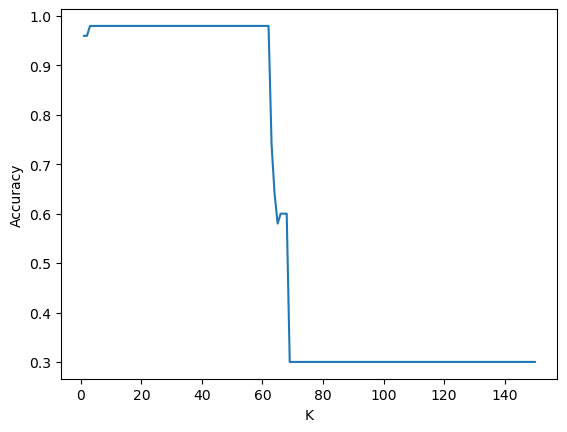

In [170]:
K_forplot = {'K':list(range(1,n+1)), 'Accuracy':K_p}

K_forplot = pd.DataFrame(K_forplot)
sns.lineplot(data=K_forplot, x='K',y='Accuracy')

In [195]:
def plt_nine(xx,yy,plot_k):
    plt.figure(figsize=(20,20))
    fig, axs = plt.subplots(xx, yy)

    a = 0
    b = 0
    k = 0
    while a < xx:
        if b < yy:

            y_hat = []

            for i in range(len(df_test)):
                #find every data point in testing data
                tmp = X_test.iloc[i]
                #calculate the distance between training data and testing data
                df_train['distance'] = X_train.apply(lambda row:Euclidean_distance(row,tmp), axis=1)
                #sort X_train according to the three point with closest distance
                y_hat.append(mode(list(df_train.sort_values(by=['distance']).head(plot_k[k])['y'])))
                
            df_test['y_hat'] = y_hat


            axs[a, b].scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['sepal_length']
            ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['petal_length']
            ,c='blue')

            axs[a, b].scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['sepal_length']
                        ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['petal_length']
                       ,c='orange')

            axs[a, b].scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==2]['sepal_length']
                        ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==2]['petal_length']
                       ,c='red')

            axs[a, b].scatter(x=df_test[df_test['y'] != df_test['y_hat']]['sepal_length']
                        ,y=df_test[df_test['y'] != df_test['y_hat']]['petal_length']
                       ,c='black',marker='x')
            
            axs[a, b].set_title(f'k={plot_k[k]}')

            b += 1
            k += 1
        else:
            a += 1
            b = 0
    for ax in axs.flat:
        ax.label_outer()
            


C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\1990298276.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axs[a, b].scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['sepal_length']
C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\1990298276.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['petal_length']
C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\1990298276.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axs[a, b].scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['sepal_length']
C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\1990298276.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['petal_length']
C:\Users\joe1029\AppData\Local\Temp\ipykernel_2744\1990298276.py:3

<Figure size 2000x2000 with 0 Axes>

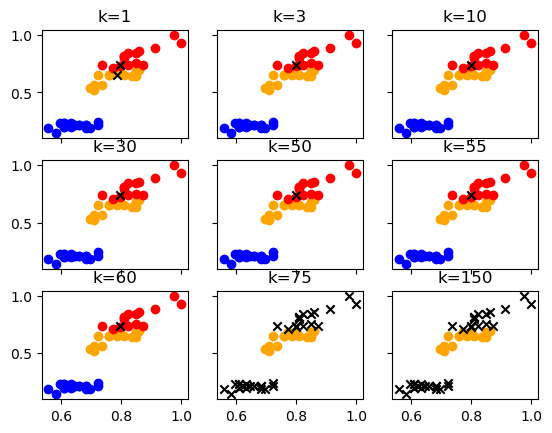

In [196]:
plot_k = [1,3,10,30,50,55,60,75,150]
xx = 3
yy = 3
plt_nine(xx,yy,plot_k)

In [ ]:
plot_k = [1,3,10,30,50,55,60,75,150]
fig, axs = plt.subplots(3, 3)
for k in plot_k:
    y_hat = []

    for i in range(len(df_test)):
        #find every data point in testing data
        tmp = X_test.iloc[i]
        #calculate the distance between training data and testing data
        df_train['distance'] = X_train.apply(lambda row:Euclidean_distance(row,tmp), axis=1)
        #sort X_train according to the three point with closest distance
        y_hat.append(mode(list(df_train.sort_values(by=['distance']).head(k)['y'])))
    

    axs[0, 0].plt.scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['sepal_length']
                ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==0]['petal_length']
               ,c='blue')

    axs[0, 0].plt.scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['sepal_length']
                ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==1]['petal_length']
               ,c='orange')

    axs[0, 0].plt.scatter(x=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==2]['sepal_length']
                ,y=df_test[df_test['y'] == df_test['y_hat']][df_test['y']==2]['petal_length']
               ,c='red')

    axs[0, 0].plt.scatter(x=df_test[df_test['y'] != df_test['y_hat']]['sepal_length']
                ,y=df_test[df_test['y'] != df_test['y_hat']]['petal_length']
               ,c='black',marker='x')

    l = [0,1,2]
    plt.legend(l)